In [89]:
from mlxtend.data import loadlocal_mnist
import platform
import pandas as pd
import numpy as np
from skimage.feature import hog
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
%matplotlib inline

In [225]:
X_train, y_train = loadlocal_mnist(images_path='train-images.idx3-ubyte', labels_path='train-labels.idx1-ubyte')

In [264]:
X_test, y_test = loadlocal_mnist(images_path='t10k-images.idx3-ubyte', labels_path='t10k-labels.idx1-ubyte')

In [ ]:
X_train

In [227]:
def HOG(X, image_shape=(28, 28), pixels_per_cell=(2, 2)):
    feature_matrix = []
    for row in X:
        img = row.reshape(image_shape)
        fd = hog(img, orientations=8, pixels_per_cell=pixels_per_cell, cells_per_block=(2, 2))
        feature_matrix.append(fd)
    
    return np.array(feature_matrix)

In [228]:
Xtrain = HOG(X_train, pixels_per_cell=(2, 2))

In [229]:
Xtest = HOG(X_test, pixels_per_cell=(2, 2))

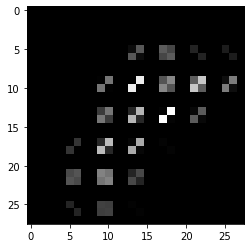

In [186]:
plt.imshow(hog_img, cmap='gray');

In [204]:
Xtrain

array([[0.11321069, 0.        , 0.02261002, ..., 0.10044161, 0.07227272,
        0.17108089],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01044446,
        0.01364805],
       [0.17534901, 0.09214299, 0.06079978, ..., 0.        , 0.        ,
        0.36964048],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.26874882,
        0.12222058],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01936122],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [205]:
Xtrain.shape

(60000, 128)

In [12]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [230]:
KNN.fit(Xtrain,y_train)

KNeighborsClassifier()

In [231]:
predictions = KNN.predict(Xtest)

In [232]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [233]:
KNN_accuracy = metrics.accuracy_score(y_test, predictions)

In [234]:
KNN_accuracy

0.9656

In [46]:
supportVectorModel = svm.LinearSVC()

In [235]:
supportVectorModel.fit(Xtrain, y_train)

C:\Users\Zoey\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [236]:
SVM_predictions = supportVectorModel.predict(Xtest)

In [237]:
SVM_accuracy = metrics.accuracy_score(y_test, SVM_predictions)

In [238]:
SVM_accuracy

0.9779

In [239]:
SVCModel = svm.SVC()

In [240]:
SVCModel.fit(X_train, y_train)

SVC()

In [241]:
SVC_predictions = SVCModel.predict(X_test)

In [242]:
SVC_accuracy = metrics.accuracy_score(y_test, SVC_predictions)

In [243]:
SVC_accuracy

0.9792

In [75]:
X_train.shape

(60000, 784)

In [244]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

In [245]:
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [160]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [263]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [250]:
print(Xtrain.shape)
print(Xtest.shape)

(60000, 5408)
(10000, 5408)


In [255]:
ANN = Sequential()
ANN.add(Dense(10, input_dim=5408, activation='relu'))
ANN.add(Dense(10, activation='sigmoid'))
ANN.add(Dense(10, activation='relu'))
ANN.add(Dense(10, activation='softmax'))

In [256]:
ANN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                54090     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
Total params: 54,420
Trainable params: 54,420
Non-trainable params: 0
_________________________________________________________________


In [257]:
ANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [258]:
ANN.fit(Xtrain, y_train, epochs=15, batch_size=5)

Epoch 1/15
60000/60000 [==============================] - 59s 977us/step - loss: 0.3317 - acc: 0.9140
Epoch 2/15
60000/60000 [==============================] - 57s 952us/step - loss: 0.1402 - acc: 0.9617
Epoch 3/15
60000/60000 [==============================] - 57s 948us/step - loss: 0.1059 - acc: 0.9701
Epoch 4/15
60000/60000 [==============================] - 56s 940us/step - loss: 0.0854 - acc: 0.9754
Epoch 5/15
60000/60000 [==============================] - 57s 945us/step - loss: 0.0733 - acc: 0.9788
Epoch 6/15
60000/60000 [==============================] - 58s 964us/step - loss: 0.0648 - acc: 0.9812
Epoch 7/15
60000/60000 [==============================] - 58s 968us/step - loss: 0.0567 - acc: 0.9836
Epoch 8/15
60000/60000 [==============================] - 59s 980us/step - loss: 0.0528 - acc: 0.9849
Epoch 9/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0476 - acc: 0.9865
Epoch 10/15
60000/60000 [==============================] - 58s 970us/step - loss: 0.

In [260]:
predictions = ANN.predict(Xtest)
print(predictions)

[[2.8250582e-09 1.3106757e-05 2.7435765e-04 ... 9.9970764e-01
  4.6441880e-07 1.4093335e-06]
 [1.4632870e-08 5.2637031e-08 9.9982810e-01 ... 1.2025370e-04
  1.9048640e-06 6.6484759e-08]
 [4.8272248e-09 9.9898809e-01 3.8385232e-07 ... 2.7156124e-05
  3.9333399e-06 7.4701134e-08]
 ...
 [4.5123188e-13 9.2169512e-06 1.4775874e-07 ... 9.3032486e-06
  3.4035838e-05 3.1680401e-04]
 [2.1373057e-06 1.5033801e-07 8.1581064e-08 ... 1.4837034e-10
  1.1281908e-05 8.9970627e-06]
 [1.8393767e-07 3.4539731e-05 4.1633530e-08 ... 7.6738990e-11
  2.0910323e-07 8.9480928e-08]]


In [261]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


In [265]:
ANN_accuracy = metrics.accuracy_score(y_test, predictions)
ANN_accuracy

0.9681